In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [3]:
# Read in Revenue Files
file_2009 = "../../datasets/subsets/inst_ex/inst_ex_2009.csv"

inst_2009 = pd.read_csv(file_2009)
inst_2009 = inst_2009.set_index(['STNAME'])
inst_2009

,2009_E11,2009_E12,2009_E13,2009_E14,2009_E15,2009_E16,2009_E17,2009_E18,2009_E11A,2009_E11B,2009_E11C,2009_E11D,2009_E2
STNAME,,,,,,,,,,,,,
alabama,2538696534,995728866,103224835,2219880.0,2.978400e+05,245035128,9873274,12595363,1.793873e+09,1.935873e+08,110639595.0,30379331.0,31885024.0
alaska,605309764,394575674,58449208,189079.0,1.346780e+05,55816469,8302033,9234020,NaN,NaN,NaN,NaN,NaN
arizona,3531455165,845882579,226773945,10971707.0,3.001338e+07,166216754,156816290,125482579,2.153071e+09,3.684730e+08,71449799.0,136428754.0,102803474.0
arkansas,1716716223,448615309,79542379,11180382.0,7.289625e+06,187295336,23615315,18755105,1.125283e+09,1.795275e+08,86586821.0,145323547.0,39380204.0
california,24365951573,7573922649,1580419020,795996382.0,3.997403e+08,1622480478,30718082,3661594,1.795366e+10,2.824563e+09,153531874.0,818092805.0,487491829.0
colorado,2970930299,686310904,105025053,41608165.0,8.826630e+06,277942843,51657856,60049167,2.111675e+09,3.457195e+08,85977940.0,99190579.0,55887395.0
connecticut,3444803590,1330076790,176676643,357872022.0,5.628390e+07,124644435,38467767,7562239,2.232150e+09,3.735352e+08,41007061.0,123220682.0,NaN
delaware,595656994,262135049,12515151,6509597.0,6.616699e+07,38954299,2247306,9640219,3.713943e+08,1.172639e+08,17380309.0,24674969.0,6240316.0
district of columbia,395532249,53516401,23093371,140128700.0,NaN,10882755,7312017,962970,1.077873e+08,1.543381e+07,796624.0,3696538.0,2471732.0


In [4]:
(inst_2009.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      58.610230
new york        55.773905
texas           24.595093
pennsylvania    24.231606
illinois        23.727891
dtype: float64

In [5]:
summary_2009 = pd.DataFrame(inst_2009.sum(axis=1)/100000000, columns=['Total InstructionalEx ($100M)'])
summary_2009['InstructionalEx ($100M)'] = inst_2009.iloc[:,0:8].sum(axis=1)/100000000
summary_2009['Teacher Salaries ($100M)'] = inst_2009.iloc[:,8:13].sum(axis=1)/100000000
summary_2009

,Total InstructionalEx ($100M),InstructionalEx ($100M),Teacher Salaries ($100M)
STNAME,,,
alabama,60.680356,39.076717,21.603639
alaska,11.320109,11.320109,0.000000
arizona,79.258379,50.936124,28.322255
arkansas,40.691109,24.930097,15.761013
california,586.102303,363.728901,222.373403
colorado,69.008008,42.023509,26.984499
connecticut,83.062999,55.363874,27.699125
delaware,15.307794,9.938256,5.369538
district of columbia,7.616145,6.314285,1.301860


In [6]:
summary_pct = pd.DataFrame(summary_2009['InstructionalEx ($100M)'] / summary_2009['Total InstructionalEx ($100M)'] *100, columns = ['Instructional (%)'])
summary_pct['Teacher Salaries (%)'] = summary_2009['Teacher Salaries ($100M)'] / summary_2009['Total InstructionalEx ($100M)'] *100
summary_pct

,Instructional (%),Teacher Salaries (%)
STNAME,,
alabama,64.397640,35.602360
alaska,100.000000,0.000000
arizona,64.265917,35.734083
arkansas,61.266692,38.733308
california,62.058944,37.941056
colorado,60.896569,39.103431
connecticut,66.652871,33.347129
delaware,64.922851,35.077149
district of columbia,82.906575,17.093425


In [7]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2009.csv"

success_2009 = pd.read_csv(dropout_path)
success_2009

,STNAME,2009_DRP912,2009_DRP9,2009_DRP10,2009_DRP11,2009_DRP12,2009_DRPAM,2009_DRPAS,2009_DRPHI,2009_DRPBL,2009_DRPWH
0,alabama,1.500000,1.299999,1.599999,1.700000,1.500000,1.200000,0.700000,1.599999,1.700000,1.400000
1,alaska,7.000000,3.699999,5.399998,9.399994,9.500000,1.200000,NaN,0.200000,0.500000,0.200000
2,arizona,8.299995,8.000000,6.299999,7.899998,11.000000,12.899994,5.000000,10.199997,10.099998,6.099998
3,arkansas,4.099998,2.299999,3.699999,5.199997,5.599998,4.500000,3.799999,4.699997,5.699997,3.500000
4,california,5.000000,2.500000,3.000000,4.099998,11.000000,6.799999,2.400000,6.199997,9.199997,3.199999
5,colorado,6.099998,4.099998,4.500000,6.299999,10.000000,12.299995,3.400000,11.399994,9.599998,3.699999
6,connecticut,3.099998,2.699999,2.799999,3.299999,3.599998,2.400000,0.900000,7.399998,6.799999,1.400000
7,delaware,5.099998,6.099998,5.299999,4.399998,4.399998,5.399998,2.299999,6.599998,6.899998,4.099998
8,district of columbia,7.000000,8.099998,5.899998,4.199997,4.000000,NaN,5.299999,8.299995,6.899998,4.799999
9,florida,2.599998,2.400000,2.599998,2.699999,2.900000,2.900000,0.900000,3.000000,4.299999,1.799999


In [9]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_pct['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
alabama,64.397640,35.602360,1.5
alaska,100.000000,0.000000,7
arizona,64.265917,35.734083,8.3
arkansas,61.266692,38.733308,4.1
california,62.058944,37.941056,5
colorado,60.896569,39.103431,6.1
connecticut,66.652871,33.347129,3.1
delaware,64.922851,35.077149,5.1
district of columbia,82.906575,17.093425,7


In [10]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
illinois,62.073512,37.926488,11.5
arizona,64.265917,35.734083,8.3
alaska,100.000000,0.000000,7
district of columbia,82.906575,17.093425,7
louisiana,62.186368,37.813632,6.8
colorado,60.896569,39.103431,6.1
north carolina,65.022240,34.977760,5.3
nevada,61.464468,38.535532,5.1
delaware,64.922851,35.077149,5.1


In [11]:
summary_2009['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_2009['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    

summary_2009 = summary_2009[summary_2009['Dropout Rate'].notna()]
summary_2009['Dropout Rate'] = summary_2009['Dropout Rate'].astype(float)
summary_2009.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total InstructionalEx ($100M)  51 non-null     float64
 1   InstructionalEx ($100M)        51 non-null     float64
 2   Teacher Salaries ($100M)       51 non-null     float64
 3   Dropout Rate                   51 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_pct['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instructional (%)     51 non-null     float64
 1   Teacher Salaries (%)  51 non-null     float64
 2   Dropout Rate          51 non-null     float64
dtypes: float64(3)
memory usage: 1.6+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


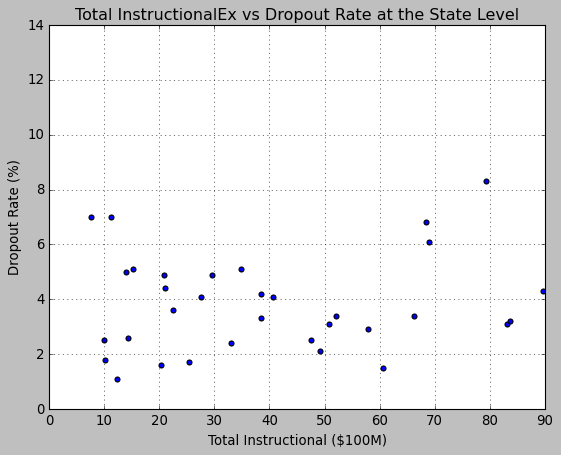

In [13]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2009['Total InstructionalEx ($100M)'], summary_2009['Dropout Rate'])
plt.xlabel('Total Instructional ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total InstructionalEx vs Dropout Rate at the State Level")
plt.grid()

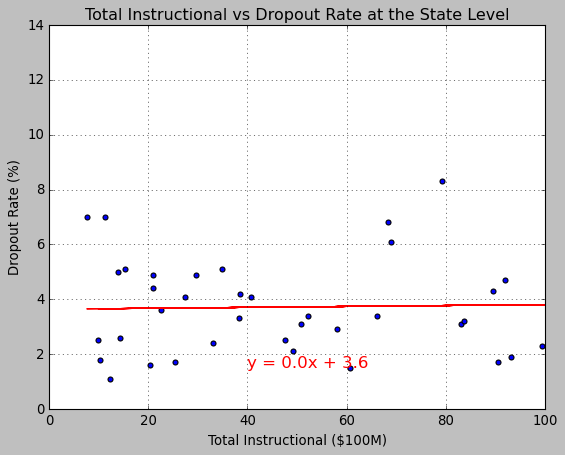

The correlation between both factors is 0.1028


In [14]:
# Total Instructional vs Dropout Rate
x_values = summary_2009['Total InstructionalEx ($100M)']
y_values = summary_2009['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

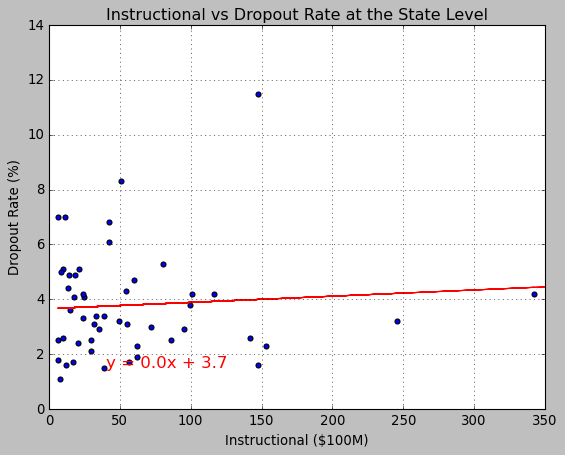

The correlation between both factors is 0.0896


In [15]:
# Total Instructional vs Dropout Rate
x_values = summary_2009['InstructionalEx ($100M)']
y_values = summary_2009['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 350)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

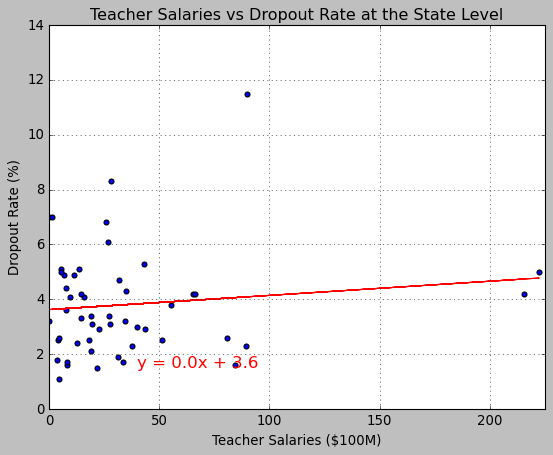

The correlation between both factors is 0.1185


In [16]:
# Teacher Salaries vs Dropout Rate
x_values = summary_2009['Teacher Salaries ($100M)']
y_values = summary_2009['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 225)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

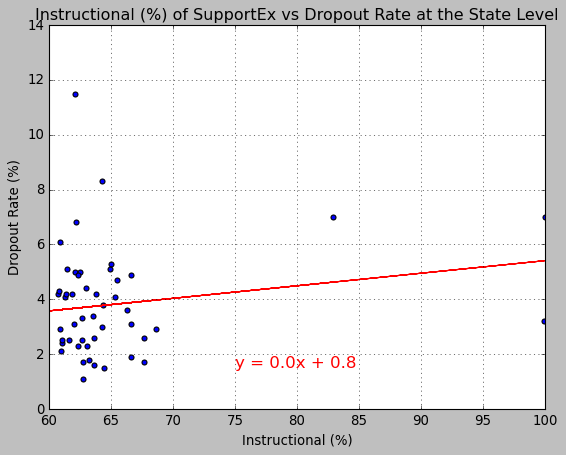

The correlation between both factors is 0.1884


In [17]:
# Instructional (%) vs Dropout Rate
x_values = summary_pct['Instructional (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,1.5),fontsize=15,color="red")
plt.xlabel('Instructional (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 60, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

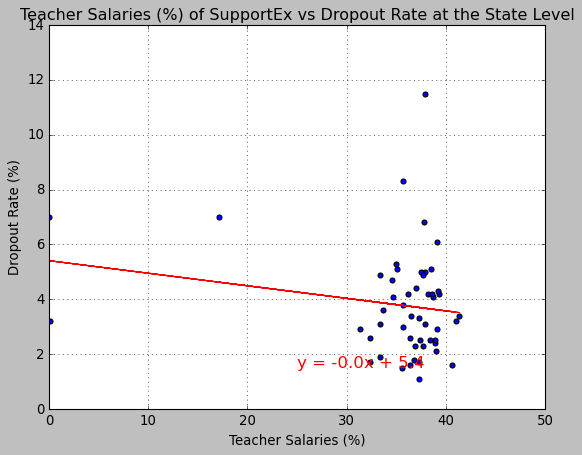

The correlation between both factors is -0.1884


In [18]:
# Teacher Salaries (%) vs Dropout Rate
x_values = summary_pct['Teacher Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 50)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")